In [13]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [2]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [3]:
df = pd.read_csv(DATA_URL + "telecom_churn.csv")


In [5]:
df.to_csv("./data/telecom_churn.csv", index=False)

In [6]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [7]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [8]:
features = ["Total day minutes", "Total intl calls"]

array([[<Axes: title={'center': 'Total day minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>]], dtype=object)

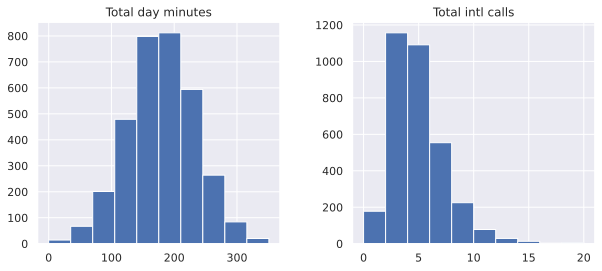

In [9]:
df[features].hist(figsize=(10, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

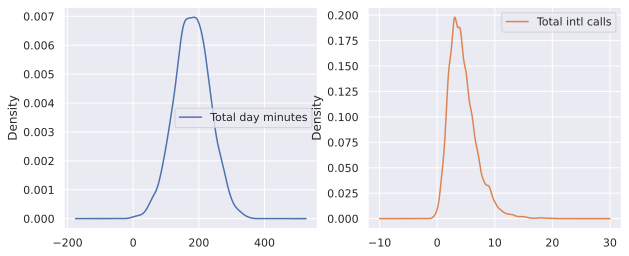

In [14]:
df[features].plot(kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4))

/tmp/ipykernel_1933800/2818465734.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Total intl calls"])


<Axes: xlabel='Total intl calls', ylabel='Density'>

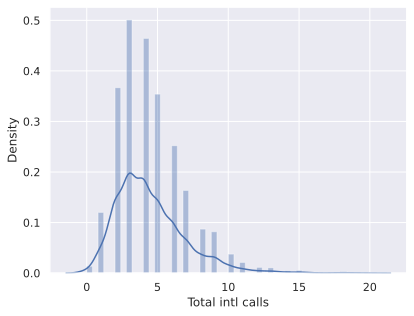

In [17]:
sns.distplot(df["Total intl calls"])

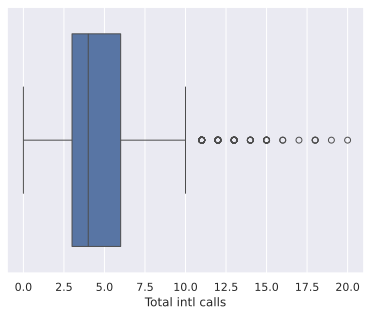

In [18]:
sns.boxplot(x="Total intl calls", data=df);

<Axes: ylabel='Total intl calls'>

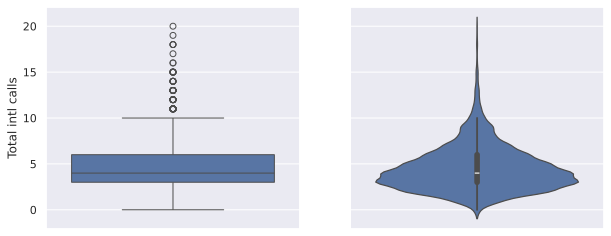

In [19]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1])

In [20]:
df[features].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

In [21]:
df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

<Axes: xlabel='Customer service calls', ylabel='count'>

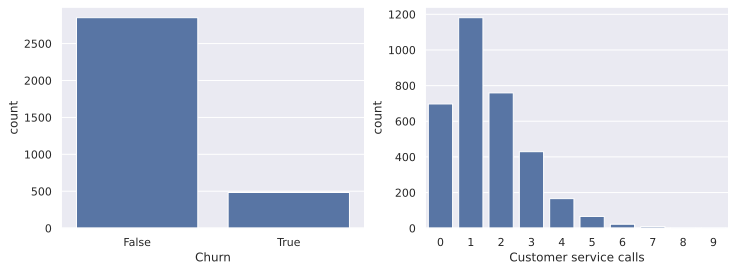

In [22]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0])
sns.countplot(x='Customer service calls', data=df, ax=axes[1])

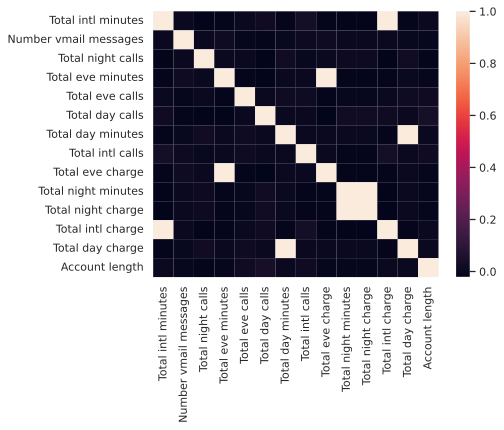

In [23]:
numerical = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn', 'Customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [24]:
numerical = list(set(df.columns) - set(["Total day charge", 'Total even charge', 'Total night charge', 'Total intl charge']))

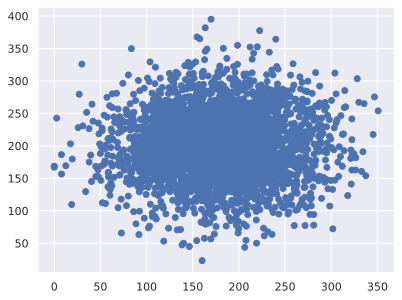

In [26]:
plt.scatter(df["Total day minutes"], df["Total night minutes"])

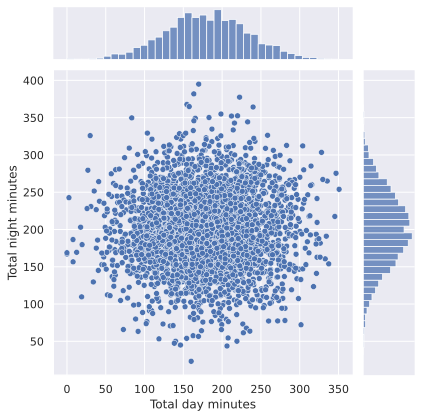

In [27]:
sns.jointplot(x="Total day minutes", y="Total night minutes", kind="scatter", data=df)

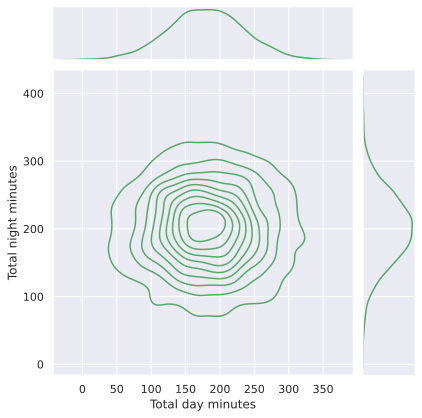

In [29]:
sns.jointplot(x='Total day minutes', y='Total night minutes', kind='kde', color='g', data=df)

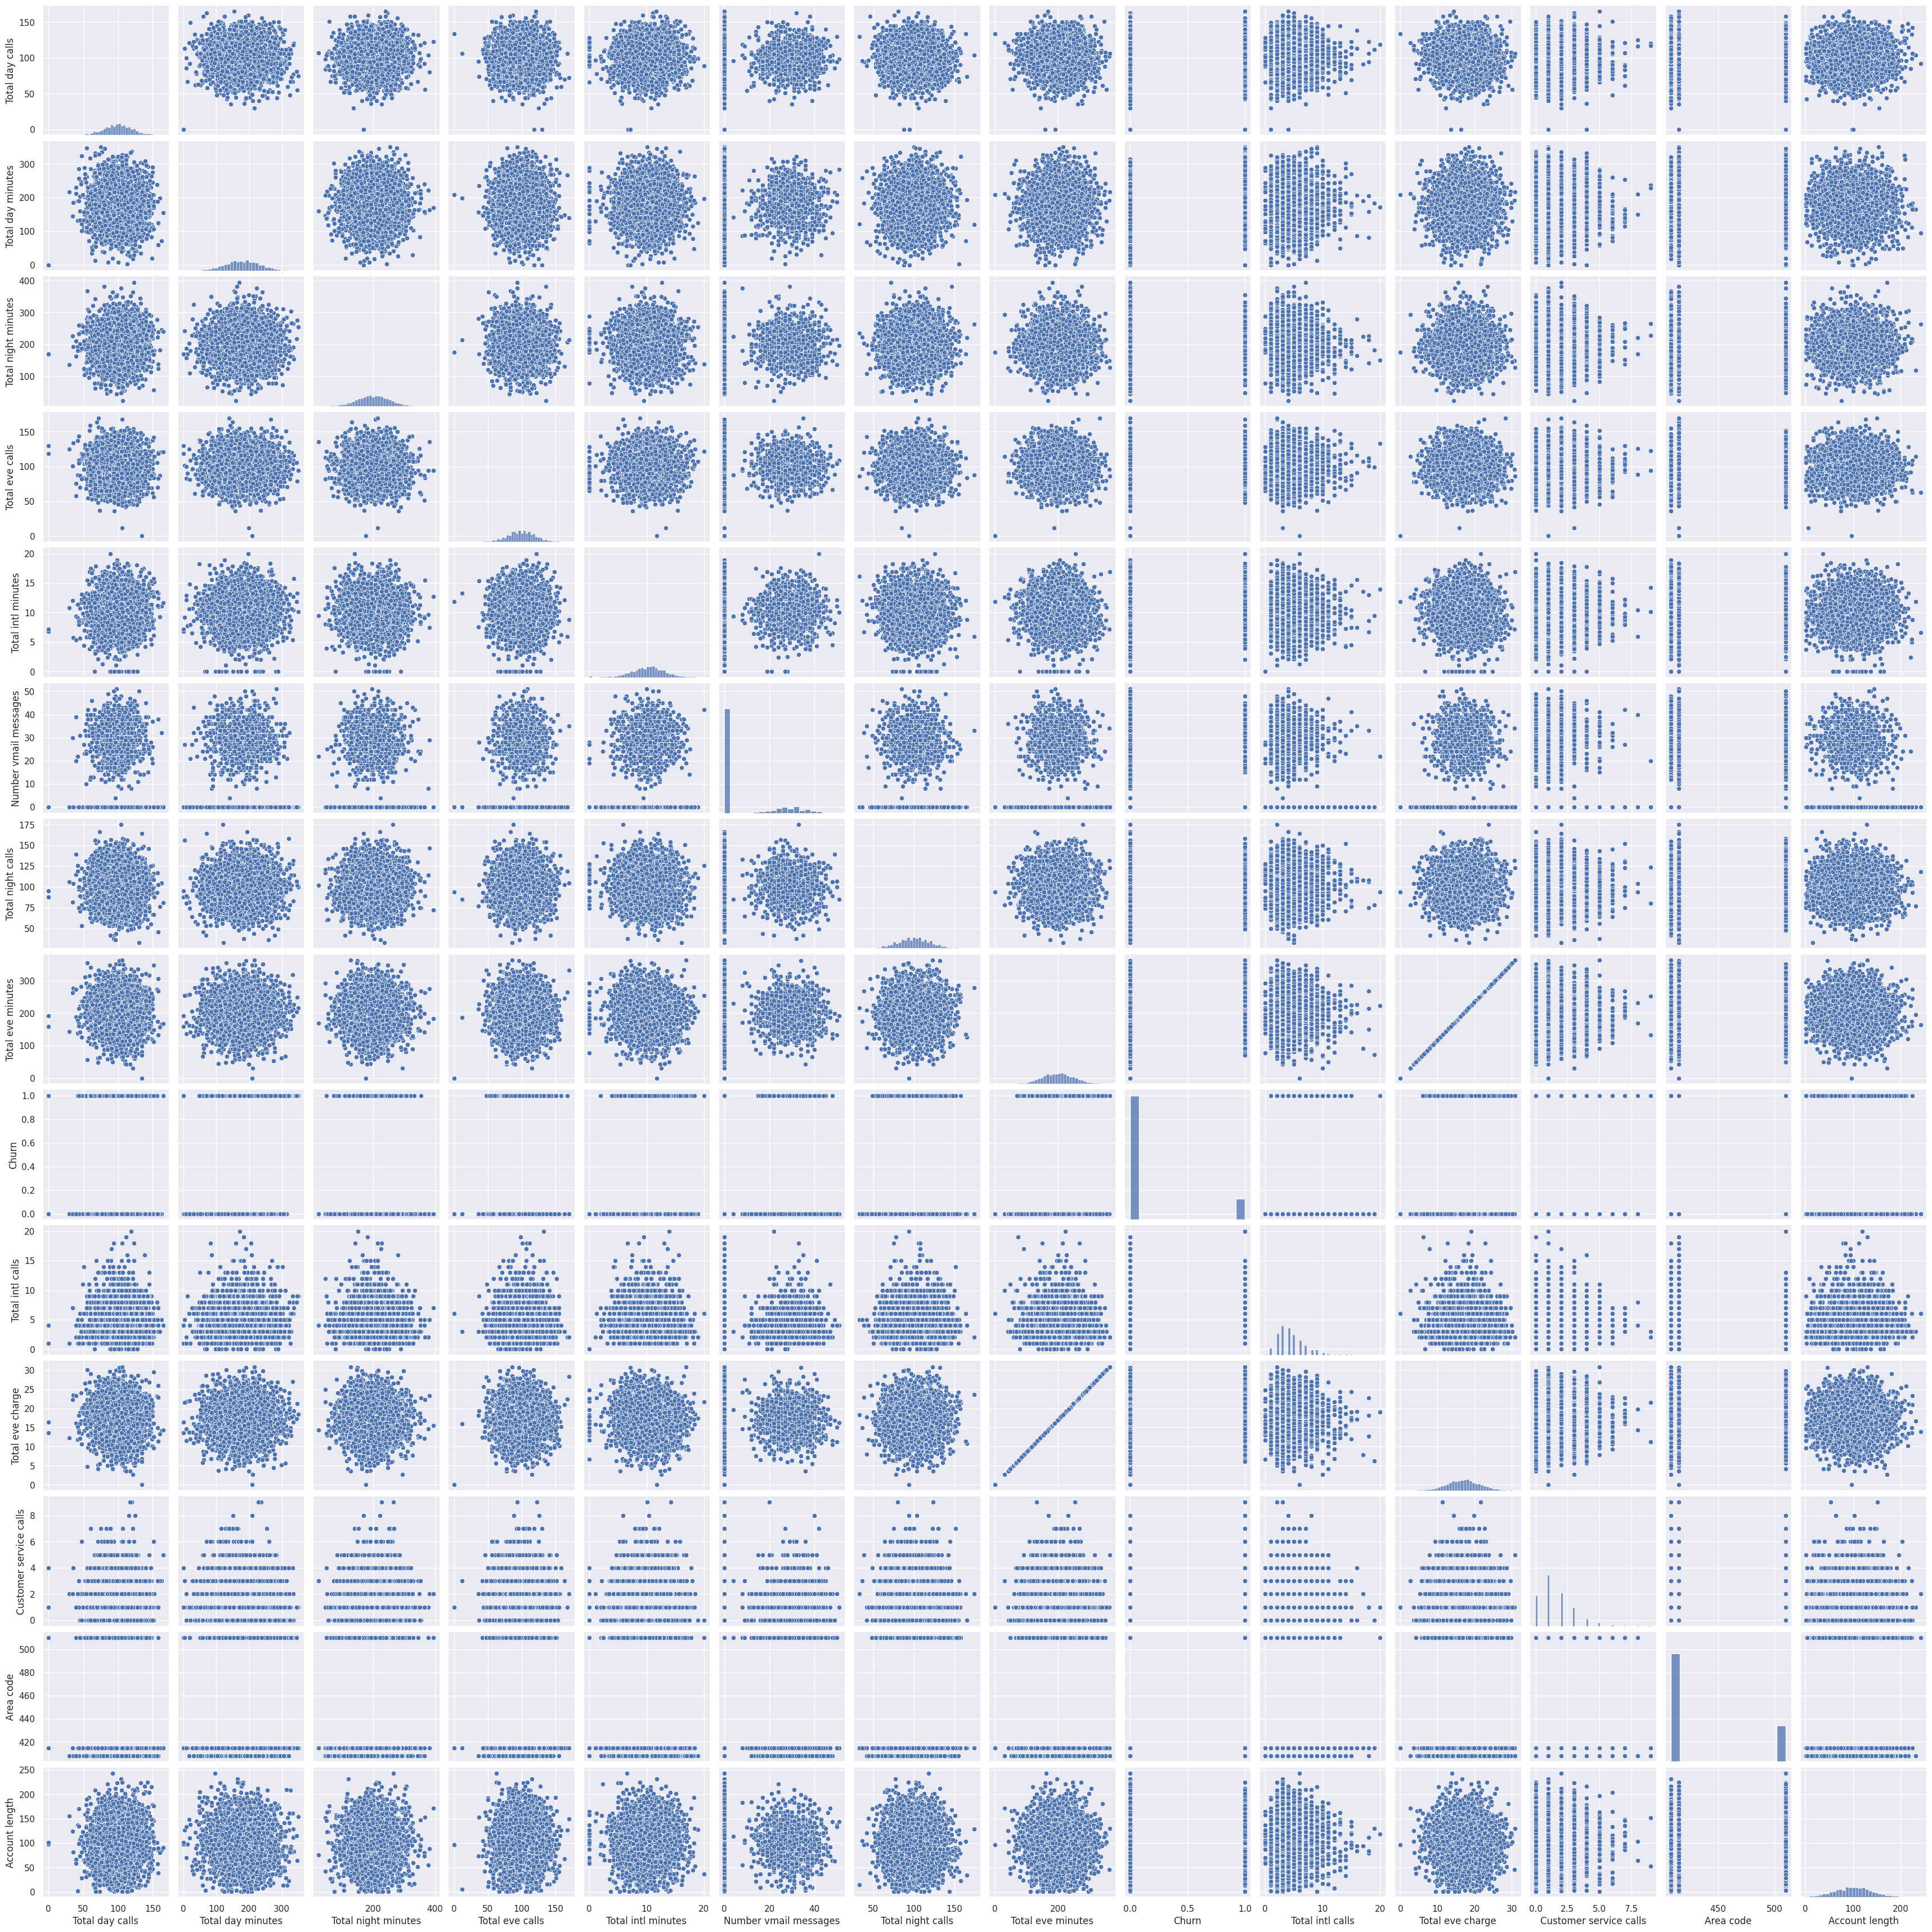

In [30]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

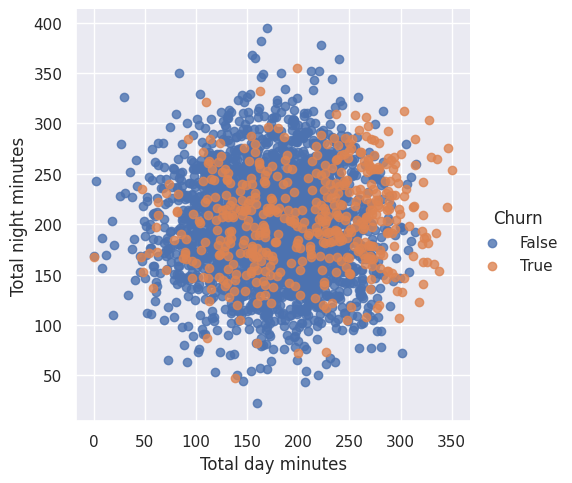

In [31]:
sns.lmplot(x='Total day minutes', y='Total night minutes', hue='Churn', data=df, fit_reg=False);

0 Total intl minutes
1 Number vmail messages
2 Total night calls
3 Total eve minutes
4 Total eve calls
5 Total day calls
6 Total day minutes
7 Total intl calls
8 Total eve charge
9 Total night minutes
10 Total night charge
11 Total intl charge
12 Total day charge


IndexError: index 3 is out of bounds for axis 0 with size 3

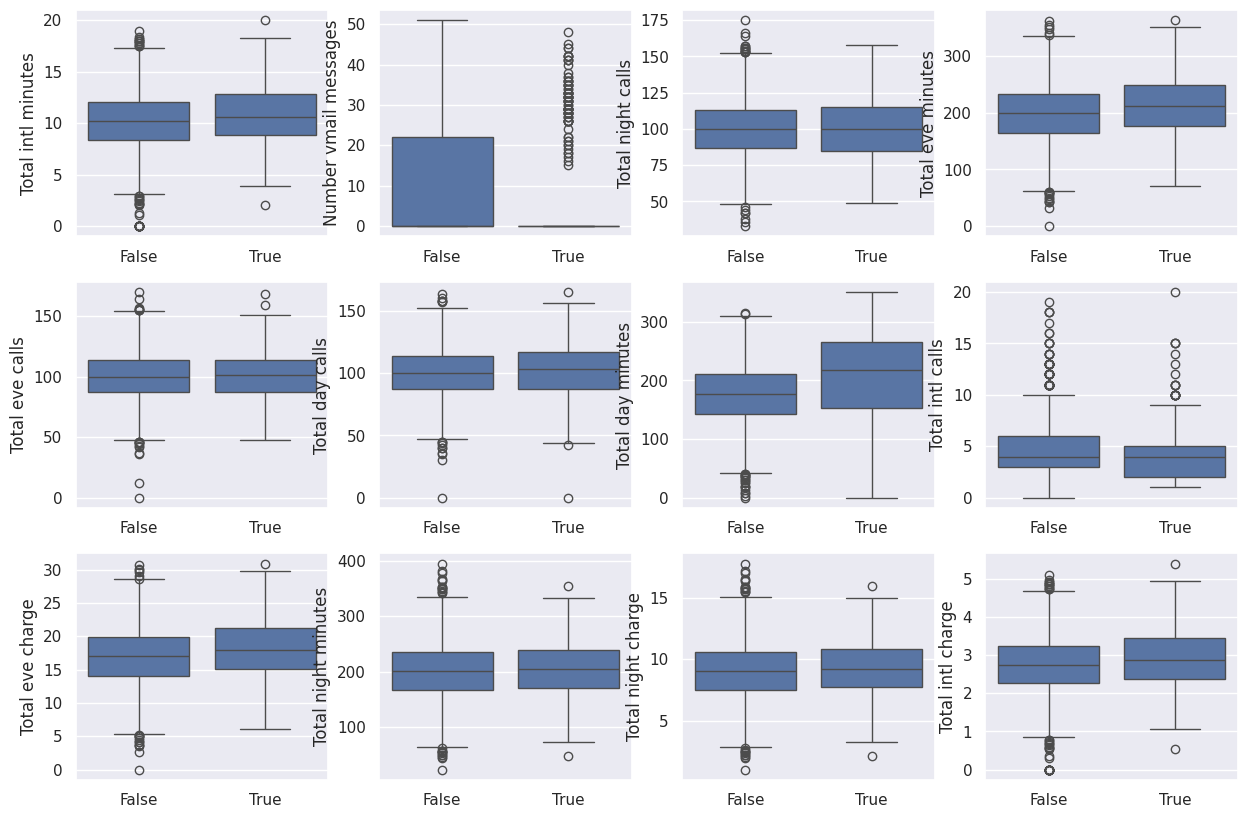

In [36]:
numerical = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn', 'Customer service calls']))

numerical.append('Customer service calls')

fix, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for idx, feat in enumerate(numerical):
    print(idx, feat)
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();


<Axes: xlabel='Churn', ylabel='Total day minutes'>

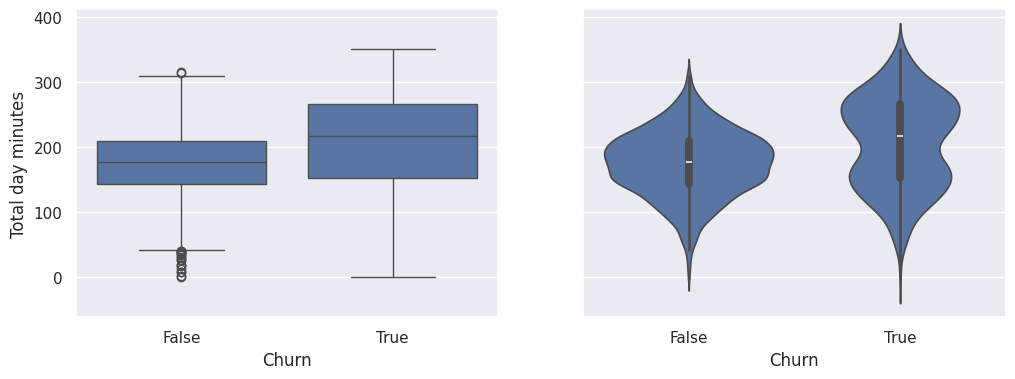

In [37]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0])
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1])

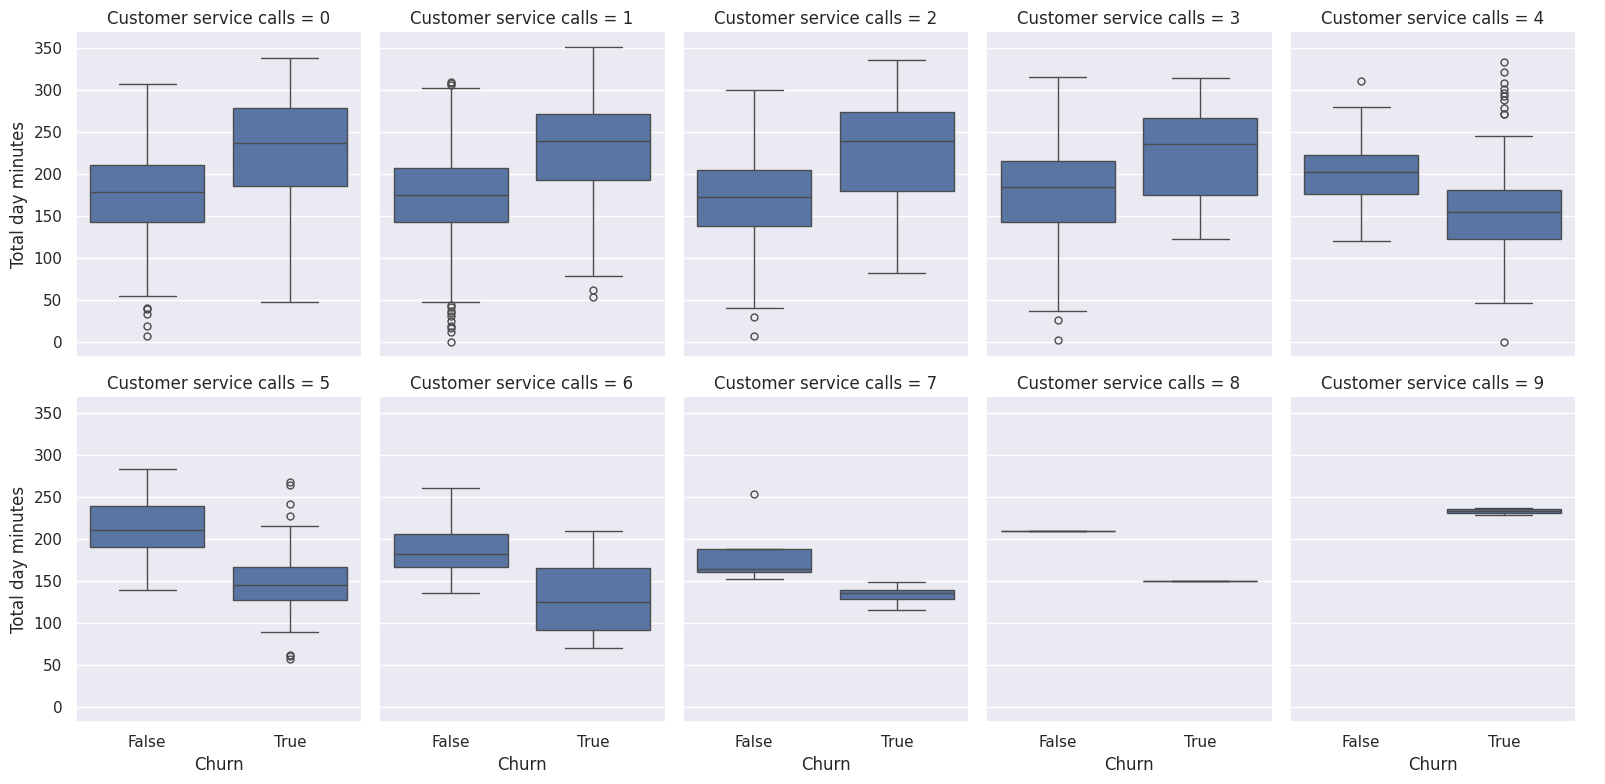

In [40]:
sns.catplot(
    x='Churn', y='Total day minutes', data=df, kind='box',
    col='Customer service calls', col_wrap=5, height=4, aspect=0.8
)

<Axes: xlabel='Customer service calls', ylabel='count'>

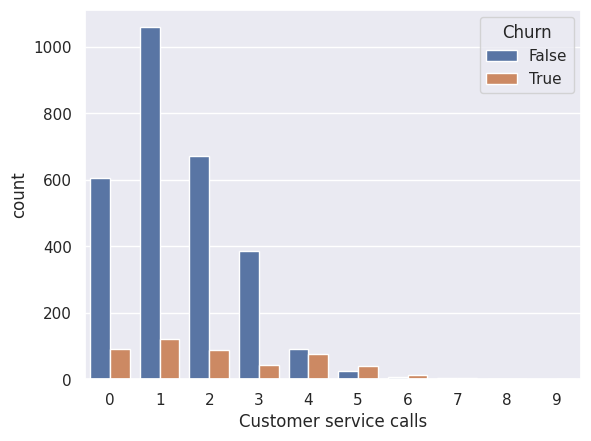

In [41]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

[<Axes: > <Axes: >]


<Axes: xlabel='Voice mail plan', ylabel='count'>

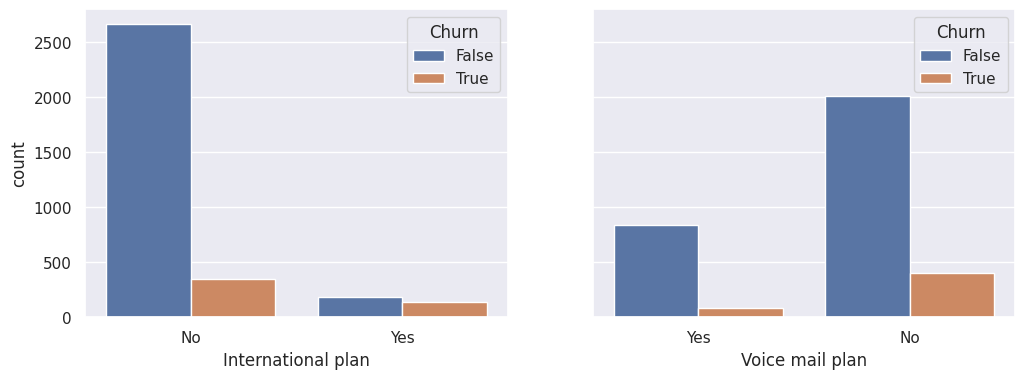

In [46]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))

print(axes)

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0])
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1])

In [48]:
pd.crosstab(df['State'], df['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

In [50]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by="mean", ascending=False).T

/tmp/ipykernel_1933800/213630956.py:1: FutureWarning: The provided callable <function mean at 0x7f436af8aac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by="mean", ascending=False).T


State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

In [55]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [56]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [61]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 11 s, sys: 1.67 s, total: 12.6 s
Wall time: 9.7 s


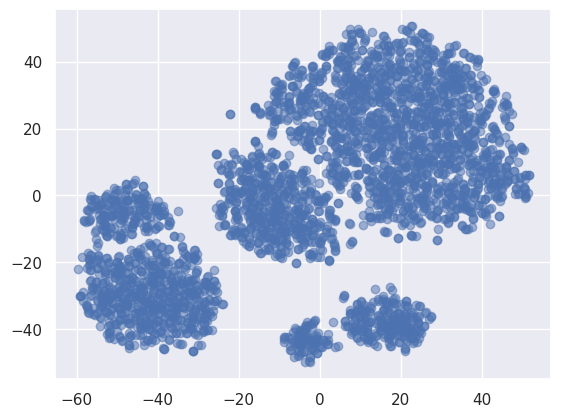

In [62]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

(3333, 2)


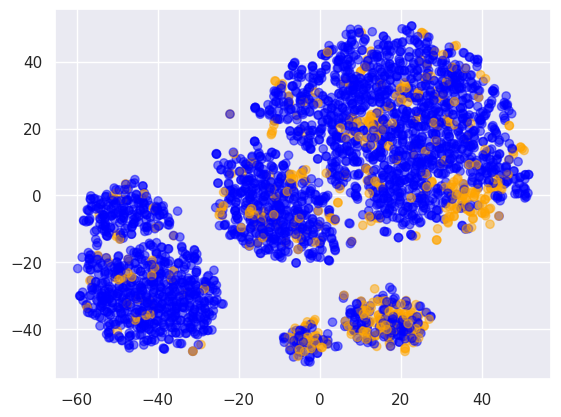

In [66]:
print(tsne_repr.shape)
plt.scatter(
    tsne_repr[:, 0], 
    tsne_repr[:, 1],
    c=df['Churn'].map({False: 'blue', True: 'orange'}),
    alpha=.5
);

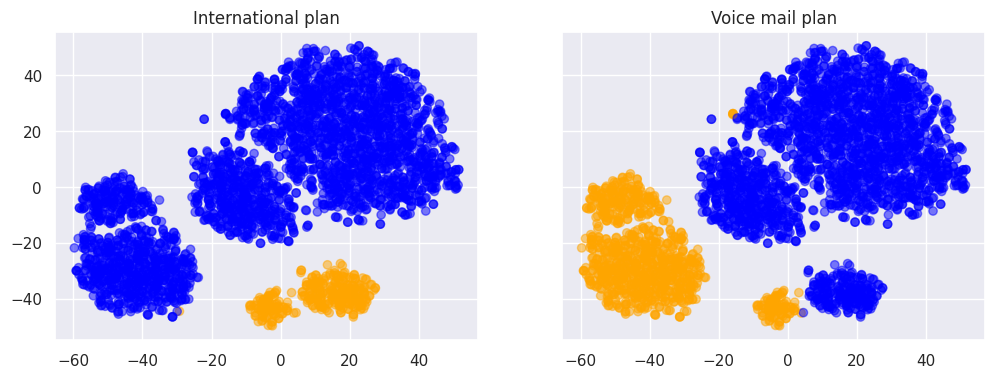

In [67]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(
        tsne_repr[:, 0], 
        tsne_repr[:, 1],
        c=df[name].map({'Yes': 'orange', 'No': 'blue'}),
        alpha=.5
    )
    axes[i].set_title(name)